In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
from utils import feature_list

data_path = '../data/'

#define some variables to be able to run it as a whole 
use_custom_font = True
save = True
show = False
load_big = False
gen_plots = False


x_train_opt_norm_path = f"{data_path}x_opt_small_train.npy"
y_train_opt_norm_path = f"{data_path}y_opt_small_train.npy"
x_test_opt_norm_path = f"{data_path}x_opt_small_test.npy"
y_test_opt_norm_path = f"{data_path}y_opt_small_test.npy"


def gen_hist(bg,sig,feature):
    
    hist_bg = np.histogram(bg[:,feature],bins = 30, density=True)
    hist_sig = np.histogram(sig[:,feature],bins = 30, density=True)

    plt.figure(figsize=(6,6), dpi=(100))
    plt.step(hist_bg[1][:-1],hist_bg[0], color = tuple(np.array([8,41,100,255])/ 255.))
    plt.step(hist_sig[1][:-1],hist_sig[0], color=tuple(np.array([200,20,8,255])/ 255.))

    plt.fill_between(hist_bg[1][:-1],hist_bg[0], np.zeros_like(hist_bg[0]), 
                    color = tuple(np.array([8,41,100,100])/ 255.), step = 'pre', label = 'Background')
    plt.fill_between(hist_sig[1][:-1],hist_sig[0], np.zeros_like(hist_sig[0]), 
                    color = tuple(np.array([200,20,8,50])/ 255.), step = 'pre', label = 'Signal')
    plt.legend()
    plt.ylabel('Density')
    plt.xlabel(feature_list[feature])

In [5]:
x_train = np.load(x_train_opt_norm_path)
y_train = np.load(y_train_opt_norm_path)
x_test = np.load(x_test_opt_norm_path)
y_test = np.load(y_test_opt_norm_path)

bg_train = np.where(y_train == 0)
sig_train = np.where(y_train == 1)

In [6]:
from keras import layers
import keras

InputLayer = keras.Input(shape=(67,))
encoder = layers.Dense(256, activation='tanh')(InputLayer)
encoder = layers.Dense(256, activation='tanh')(InputLayer)
encoder = layers.Dense(32, activation='tanh')(InputLayer)
encoder = layers.Dense(12, activation='tanh')(InputLayer)
encoder = layers.Dense(16, activation='tanh')(encoder)

decoder = layers.Dense(12, activation='tanh')(encoder)
decoder = layers.Dense(32, activation='tanh')(decoder)
decoder = layers.Dense(256, activation='tanh')(decoder)
decoder = layers.Dense(256, activation='tanh')(decoder)
decoder = layers.Dense(67, activation='tanh')(decoder)

In [7]:
autoencoder = keras.Model(InputLayer,decoder)

In [8]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')


In [9]:
autoencoder.fit(x_train,x_train, epochs=3)

Epoch 1/3
3125/3125 [==============================] - 7s 2ms/step - loss: 0.1201
Epoch 2/3
3125/3125 [==============================] - 7s 2ms/step - loss: 0.2105
Epoch 3/3
3125/3125 [==============================] - 7s 2ms/step - loss: 0.2620


In [10]:
enc = keras.Model(InputLayer,encoder)
x_tf = enc.predict(x_train)

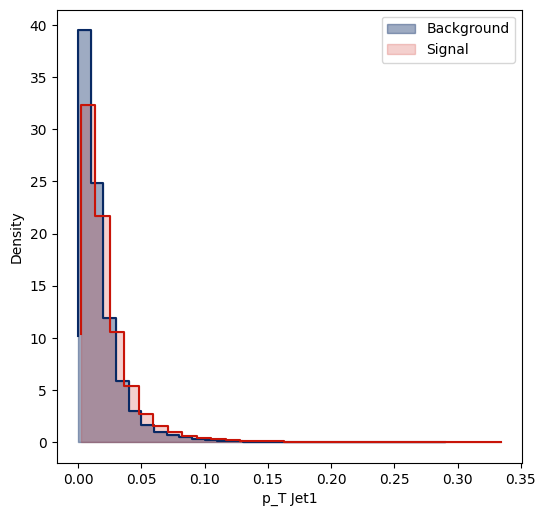

In [11]:
gen_hist(x_train[bg_train],x_train[sig_train],0)

In [12]:
xx = autoencoder.predict(x_train)
np.linalg.norm((x_train[0,:] - xx[0,:]))

6.456303495458702

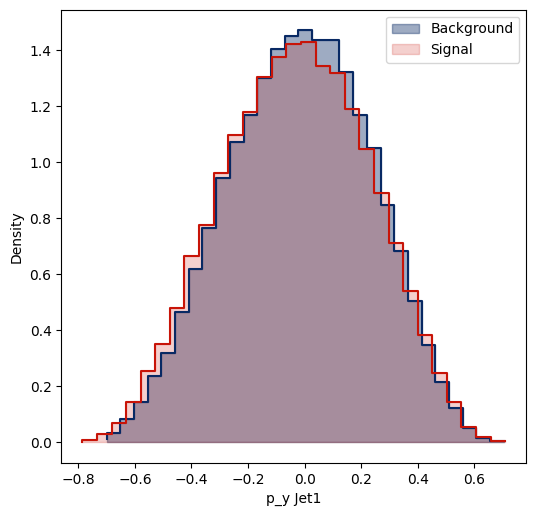

In [13]:
gen_hist(x_tf[bg_train],x_tf[sig_train],5)

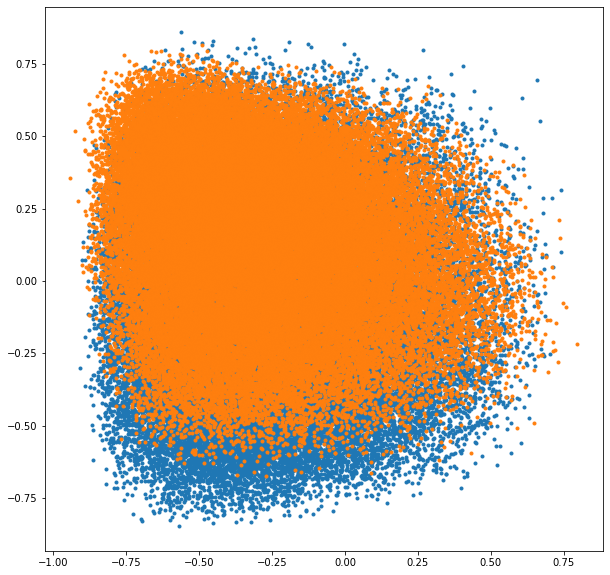

In [24]:
plt.figure(figsize=(10,10))
plt.plot(x_tf[bg_train,0].T,x_tf[bg_train,2].T,'.')
plt.plot(x_tf[sig_train,0].T,x_tf[sig_train,4].T,'.')




In [18]:
C_InputLayer = keras.Input(shape=(67,))

np.shape(x_tf])

(1, 50088)

In [97]:
from sklearn.kernel_approximation import Nystroem
feature_map = Nystroem(kernel='laplacian',gamma=0.2,n_components=8)
x_tf = feature_map.fit_transform(x_train, y_train)

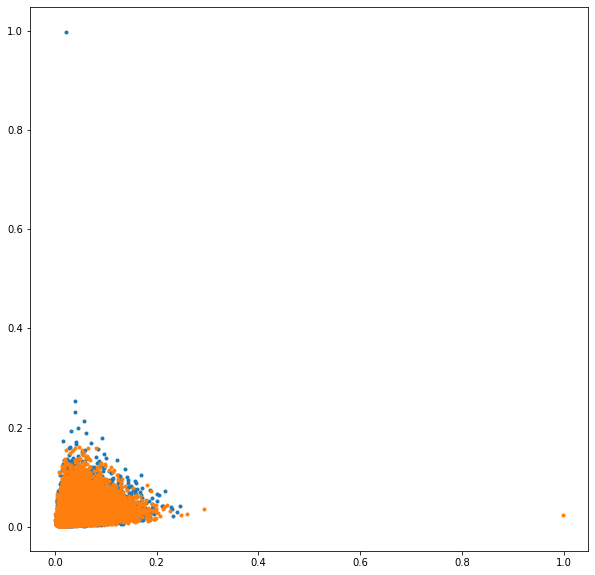

In [101]:
plt.figure(figsize=(10,10))
f1 = 0
f2 = 1
plt.plot(x_tf[bg_train,f1].T,x_tf[bg_train,f2].T,'.')
plt.plot(x_tf[sig_train,f1].T,x_tf[sig_train,f2].T,'.')

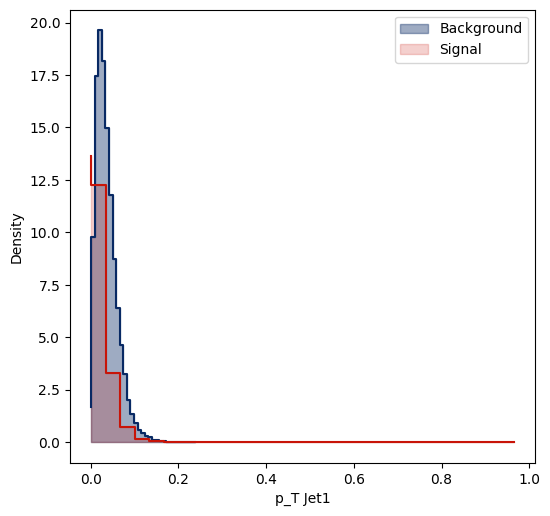

In [100]:
gen_hist(x_tf[bg_train],x_tf[sig_train],0)